In [299]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [300]:
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01

X= torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias
len(X), len(y)
X[:5], y[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120]]))

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
len(X_train), len(X_test)

(80, 20)

In [302]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")

    plt.legend(prop={"size":14})

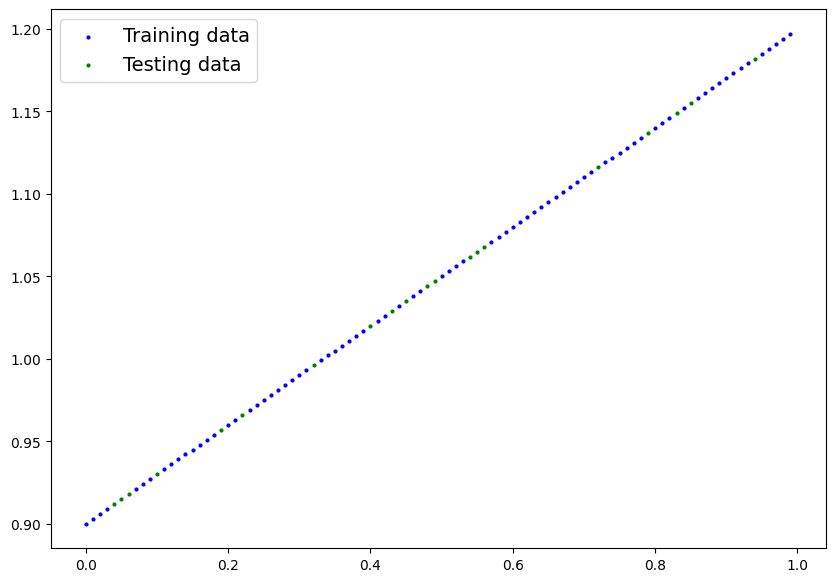

In [303]:
plot_predictions()

In [304]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        #self.weights = nn.Parameter(torch.randn(1,
         #                                       requires_grad=True,
          #                                      dtype=torch.float))
        
        #self.bias = nn.Parameter(torch.randn(1,
         #                                       requires_grad=True,
          #                                      dtype=torch.float))

        self.layer = nn.Linear(in_features=1,
                               out_features=1)
        
    def forward(self, x):
        #return self.weights * x + self.bias
        return self.layer(x)

In [305]:
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('layer.weight', tensor([[-0.4261]])),
             ('layer.bias', tensor([0.9534]))])

In [306]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [307]:
epochs = 300

for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if epoch % 20 == 0:
        model_0.eval()

        with torch.inference_mode():
            test_pred = model_0(X_test)

            test_loss = loss_fn(test_pred, y_test)
    
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.31844383478164673 | Test loss: 0.2705458104610443
Epoch: 20 | Loss: 0.18864576518535614 | Test loss: 0.16673584282398224
Epoch: 40 | Loss: 0.1463940590620041 | Test loss: 0.12614455819129944
Epoch: 60 | Loss: 0.12771596014499664 | Test loss: 0.11375172436237335
Epoch: 80 | Loss: 0.11574438959360123 | Test loss: 0.10683615505695343
Epoch: 100 | Loss: 0.10495243966579437 | Test loss: 0.10201825201511383
Epoch: 120 | Loss: 0.09489939361810684 | Test loss: 0.09365106374025345
Epoch: 140 | Loss: 0.08491484820842743 | Test loss: 0.08384818583726883
Epoch: 160 | Loss: 0.07493485510349274 | Test loss: 0.07391480356454849
Epoch: 180 | Loss: 0.06495380401611328 | Test loss: 0.06398139148950577
Epoch: 200 | Loss: 0.05497220158576965 | Test loss: 0.05404800921678543
Epoch: 220 | Loss: 0.04499061033129692 | Test loss: 0.0441146045923233
Epoch: 240 | Loss: 0.03501036763191223 | Test loss: 0.03431198000907898
Epoch: 260 | Loss: 0.025030430406332016 | Test loss: 0.02437886968255043


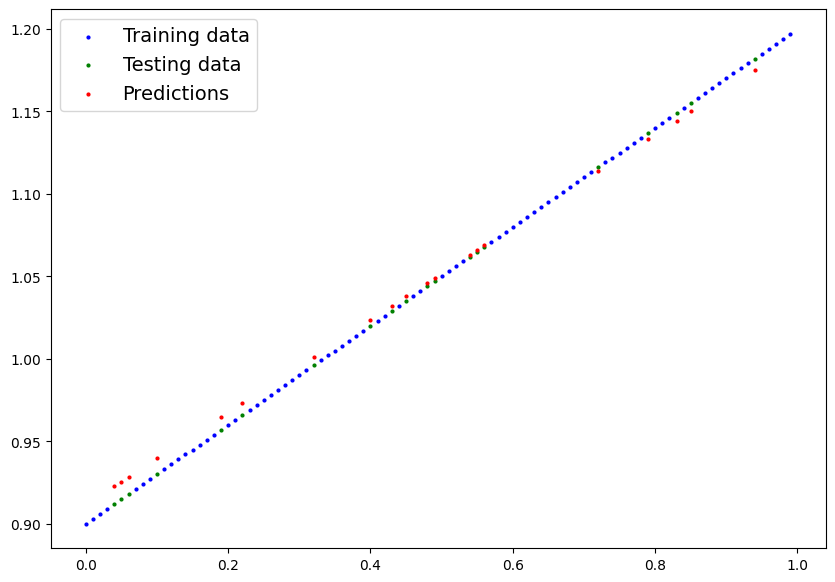

In [308]:
with torch.inference_mode():
    y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)